# Table of Contents 

1. Import Libraries 

2. Import Dataframe 

3. Data Cleaning 
    a. Extreme values check
    
4. Data prep for Regression Analysis 
    a. Hypothesis 
    
5. Regression Analysis 
    a. Interpretation of Results 
    b. Regressional Analysis vs Training Set 

## 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Import Dataframe 

In [3]:
# Create a path for quicker import
path = r'C:\Users\emily\OneDrive\Documents\Career Foundry 2022\Data Immersion\Achievement 6'

In [4]:
# Importing dataframe 
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Complete_dataset.csv'), index_col = False)

In [5]:
df.head()

,Country Rank,Year,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual,Happiness Status
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,Happy Country
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,Happy Country
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,Happy Country
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,Happy Country
4,5,2015,Canada,North America,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,Happy Country


In [6]:
df.shape

(1208, 13)

## 3. Data Cleaning 

In [7]:
# Check for missing values
df.isnull().sum()

Country Rank                         0
Year                                 0
Country                              0
Region                               0
Happiness Score                      0
Economy (GDP per Capita)             0
Family (Social Support)              0
Health (Life Expectancy)             0
Freedom (Life Choices)               0
Trust (Government Corruption)        0
Generosity (Donations to Charity)    0
Dystopia Residual                    0
Happiness Status                     0
dtype: int64

In [8]:
# Check for duplicates
df_dup = df.duplicated()

In [9]:
df_dup.shape

(1208,)

### 3a. Extreme Values Check 

C:\Users\emily\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

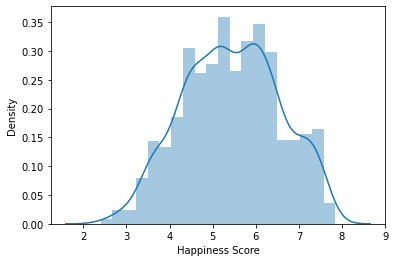

In [10]:
# Check for extreme values
sns.distplot(df['Happiness Score'], bins = 20)

In [11]:
# Check the mean 
df['Happiness Score'].mean()

5.439515728476811

In [12]:
# Check the median
df['Happiness Score'].median()

5.43

In [13]:
# Check the max 
df['Happiness Score'].max()

7.842

## 4. Data Prep for Regression Analysis 

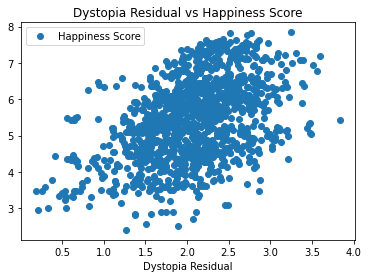

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'Dystopia Residual', y = 'Happiness Score', style ='o')
plt.title('Dystopia Residual vs Happiness Score')
plt.xlabel = 'Economy (GDP Per Capita)'
plt.ylabel = 'Happiness Score'
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['Dystopia Residual'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [16]:
X

array([[2.517],
       [2.702],
       [2.492],
       ...,
       [0.548],
       [0.216],
       [1.263]])

In [17]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [2.995],
       [2.955],
       [2.404]])

In [18]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 4a. Hypothesis

A country will classify as a "Happy Country" if theirscore  Dystopia Residual in greater than 1.88. 

In [19]:
# Group the Happiness Status and Happiness Score to find out what the minimum score is for a 'happy country'
df.groupby('Happiness Status').agg({'Happiness Score': ['min', 'max']})

Happiness Score       
                                   min    max
Happiness Status                             
Happy Country                    6.000  7.842
Somewhat Happy Country           4.015  5.999
Unhappy Country                  2.404  3.999

Any country with a happiness score below 6.000 is not considered a "Happy Country". 

## 5. Regression Analysis 

In [20]:
# Create a regression object
regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [21]:
# Fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

In [23]:
# Reload the library as Line 13 already includes plt.xlabel and plt.ylabel. Cannot label the below plot without getting an error.
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

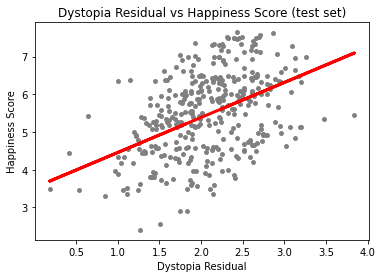

In [24]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Dystopia Residual vs Happiness Score (test set)')
plot_test.xlabel('Dystopia Residual')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92897304]]
Mean squared error:  0.9822111575664798
R2 score:  0.17593374990727473


### 5a. Interpretation 

There is a positive relationship between the dystopia residual and a country's happiness score. This confirms my hypothesis that a happy country will have a dystopia residual score of 1.88 or higher. The positive relationship indicated by the positive slope indicates that the higher the happiness score, dystopia residual scores will also increase. The MSE is 0.98, indicating that the regression line passes fairly close to the regression line. The graph shows that many points are scattered, a linear regression model may not be the best fit for this analyis. Additionally, the R2 score is a small score of 0.17, indicating that this regression analysis is a poor fit for this analysis. 

In [27]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.417,5.617256
1,7.406,5.961905
2,3.904,4.869433
3,3.808,4.856427
4,5.878,5.561518
5,6.774,5.293258
6,6.993,5.588458
7,4.308,5.094245
8,7.469,5.785401
9,4.575,5.215940


### 5b. Regressional Analysis vs Training Set 

In [28]:
# Predict the X_train

y_predicted_train = regression.predict(X_train)

In [29]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92897304]]
Mean squared error:  0.9757885957860398
R2 score:  0.2281240182298352


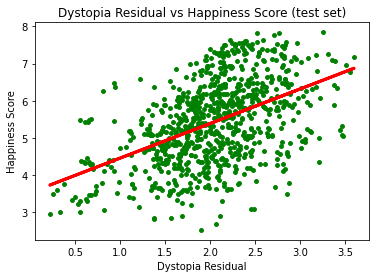

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Dystopia Residual vs Happiness Score (test set)')
plot_test.xlabel('Dystopia Residual')
plot_test.ylabel('Happiness Score')
plot_test.show()

### Comparing the model summary statistics for both the test and training sets, we see that the numbers do not vary much. The slope remains 0.92, the MSE has a 0.006 difference, and the R2 score has a 0.05 difference. This means that I have not overfit the model. 

### We can see that there is variance within the data points. The dystopia residual as one factor impacting the happiness score is not enough to predict a country's happiness score. 